In [2]:
%% Machine Learning Online Class
%  Exercise 8 | Anomaly Detection and Collaborative Filtering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     estimateGaussian.m
%     selectThreshold.m
%     cofiCostFunc.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");
page_output_immediately(1);

In [8]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easy to
%  visualize.
%
%  Our example case consists of 2 network server statistics across
%  several machines: the latency and throughput of each machine.
%  This exercise will help us find possibly faulty (or very fast) machines.
%

fprintf('Visualizing example dataset for outlier detection.\n\n');

%  The following command loads the dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data1.mat');

Visualizing example dataset for outlier detection.



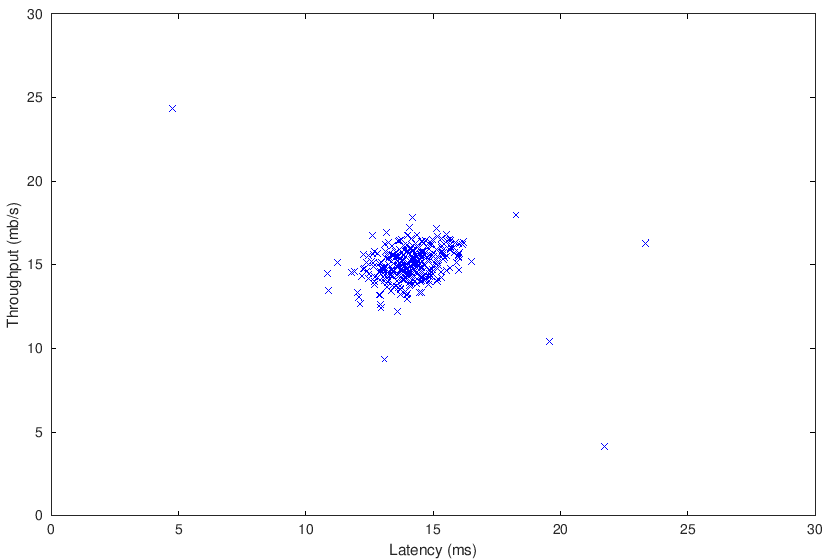

In [ ]:
%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

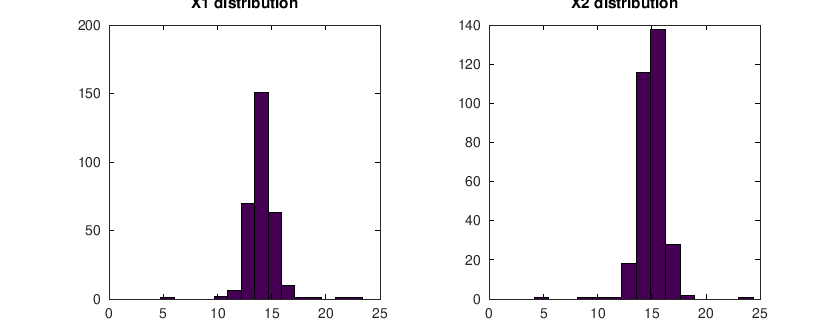

In [86]:
%check if variables are normally distributed

subplot(1, 2, 1);
hist(X(:, 1),15);
title('X1 distribution');

subplot(1, 2, 2);
hist(X(:, 2),15);
title('X2 distribution');

pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3),pos(3)*0.6]);

In [9]:
%% ================== Part 2: Estimate the dataset statistics ===================
%  For this exercise, we assume a Gaussian distribution for the dataset.
%
%  We first estimate the parameters of our assumed Gaussian distribution, 
%  then compute the probabilities for each of the points and then visualize 
%  both the overall distribution and where each of the points falls in 
%  terms of that distribution.
%
fprintf('Visualizing Gaussian fit.\n\n');

%  Estimate my and sigma2
[mu sigma2] = estimateGaussian(X);

%  Returns the density of the multivariate normal at each data point (row) 
%  of X
p = multivariateGaussian(X, mu, sigma2);

Visualizing Gaussian fit.



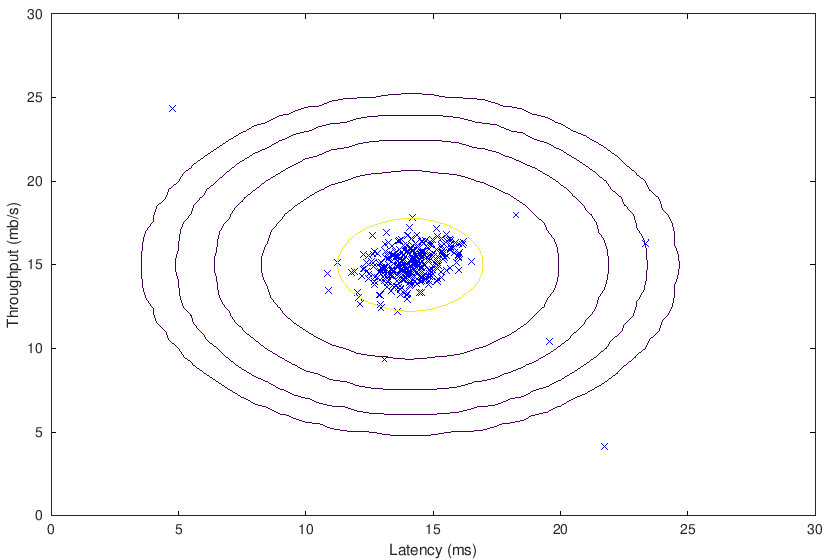

In [10]:
%  Visualize the fit
visualizeFit(X,  mu, sigma2);
axis([0 30 0 30])
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

error: scalar cannot be indexed with .
error: scalar cannot be indexed with .


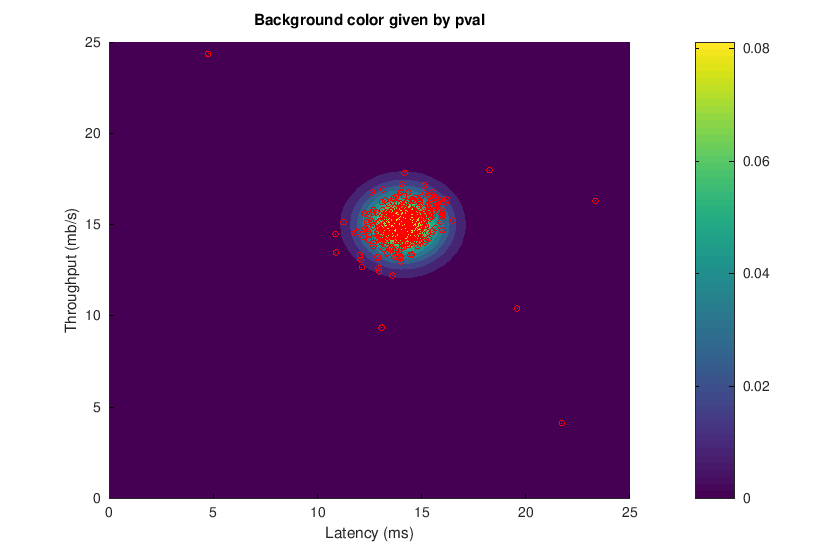

In [81]:
%  Visualize the fit

%VISUALIZEFIT Visualize the dataset and its estimated distribution.
%   VISUALIZEFIT(X, p, mu, sigma2) This visualization shows you the 
%   probability density function of the Gaussian distribution. Each example
%   has a location (x1, x2) that depends on its feature values.
%

[X1,X2] = meshgrid(0:.5:35); 
Z = multivariateGaussian([X1(:) X2(:)],mu,sigma2);
Z = reshape(Z,size(X1));

% plot(X(:, 1), X(:, 2),'bx');
hold on;
% Do not plot if there are infinities
if (sum(isinf(Z)) == 0)
    contourf(X1, X2, Z,'LineStyle','none');
    % imagesc(X1, X2, Z, 10.^(-20:3:0)');
    % imagesc(X1(1,:), X2(:,1), Z);
end
scatter1 = scatter(X(:, 1), X(:, 2),250, 'r');

% alpha(scatter1,.2)
hold off;

colorbar()
axis([0 25 0 25])
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);
title('Background color given by pval')

In [51]:
%% ================== Part 3: Find Outliers ===================
%  Now you will find a good epsilon threshold using a cross-validation set
%  probabilities given the estimated Gaussian distribution
% 

pval = multivariateGaussian(Xval, mu, sigma2);

[epsilon F1 F1Vec] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 8.99e-05)\n');
fprintf('   (you should see a Best F1 value of  0.875000)\n\n');

%  Find the outliers in the training set and plot the
outliers = find(p < epsilon);

Best epsilon found using cross-validation: 8.961568e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)
   (you should see a Best F1 value of  0.875000)



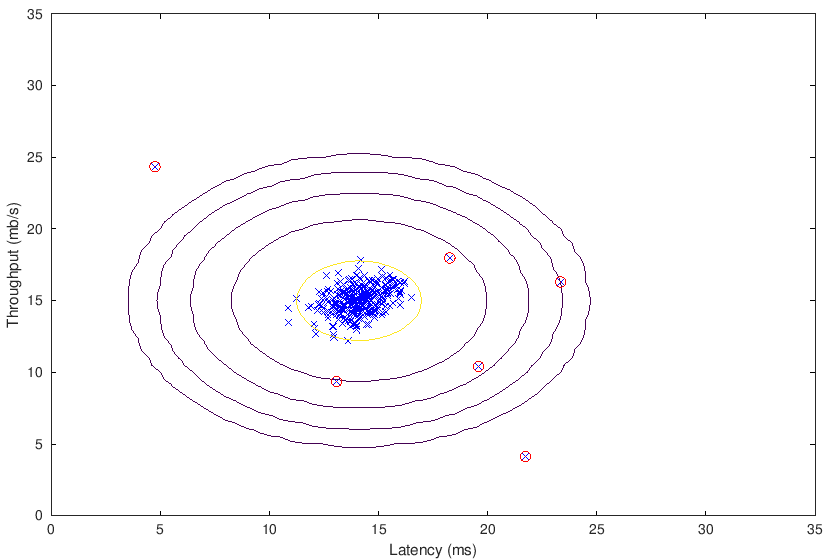

In [81]:
%  Visualize the fit
visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

%  Draw a red circle around those outliers
hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

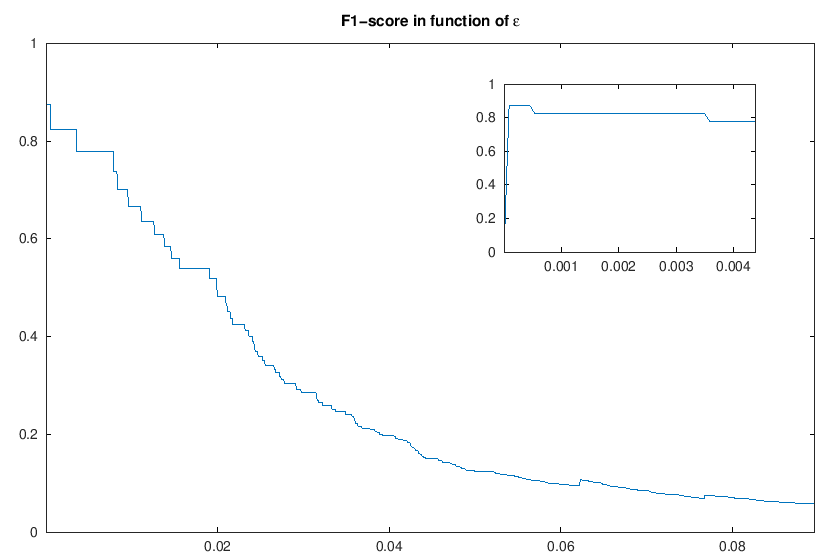

In [80]:
plot(F1Vec(:,1), F1Vec(:,2))
xlim([min(F1Vec(:,1)) max(F1Vec(:,1))])
title('F1-score in function of \epsilon', 'fontsize', 16)
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

axes('Position',[.6 .55 .3 .3])
box on
plot(F1Vec(1:50,1), F1Vec(1:50,2))
xlim([min(F1Vec(1:50,1)) max(F1Vec(1:50,1))])

In [3]:
%% ================== Part 4: Multidimensional Outliers ===================
%  We will now use the code from the previous part and apply it to a 
%  harder problem in which more features describe each datapoint and only 
%  some features indicate whether a point is an outlier.
%

%  Loads the second dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data2.mat');
size(X)

ans =

   1000     11



Pair plot of first five features with one hundred examples



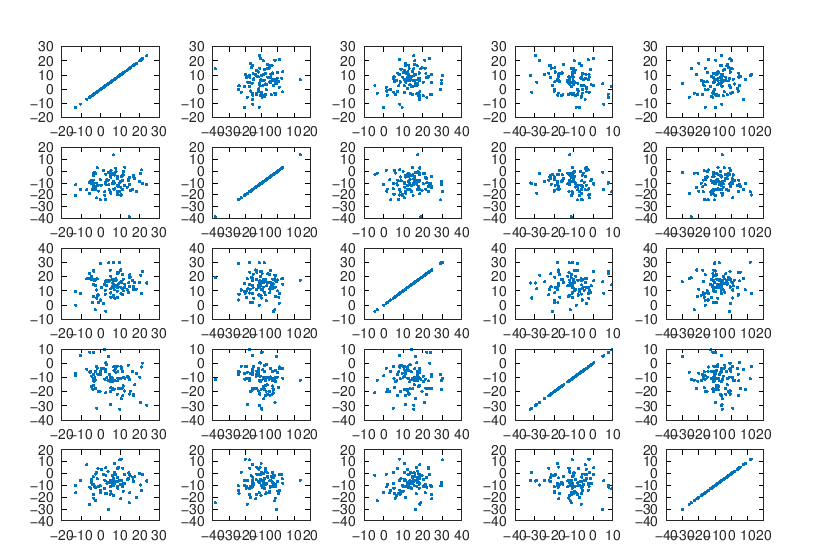

In [20]:
% plotmatrix(X)
plotmatrix(X(1:100,1:5), X(1:100,1:5))

pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

disp(['Pair plot of first five features with one hundred examples', char(10)])

In [4]:
%  Apply the same steps to the larger dataset
[mu sigma2] = estimateGaussian(X);

%  Training set 
p = multivariateGaussian(X, mu, sigma2);

%  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2);

%  Find the best threshold
[epsilon F1 F1Vec] = selectThreshold(yval, pval);

fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 1.38e-18)\n');
fprintf('   (you should see a Best F1 value of 0.615385)\n');
fprintf('# Outliers found: %d\n\n', sum(p < epsilon));

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of 0.615385)
# Outliers found: 117



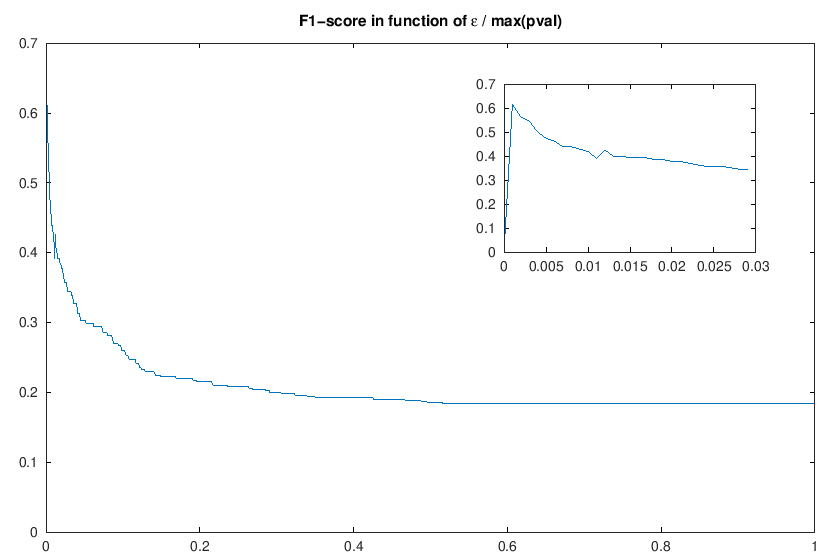

In [6]:
graphics_toolkit ("gnuplot");

plot(F1Vec(:,1)/max(F1Vec(:,1)), F1Vec(:,2))
% xlim([0, 0.6])
title('F1-score in function of \epsilon / max(pval)', 'fontsize', 16)
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

axes('Position',[.6 .55 .3 .3])
box on
plot(F1Vec(1:30,1)/max(F1Vec(:,1)), F1Vec(1:30,2))
% xlim([min(F1Vec(1:50,1))/max(F1Vec(:,1)) max(F1Vec(1:50,1))])

In [13]:
%SELECTTHRESHOLD Find the best threshold (epsilon) to use for selecting
%outliers
%   [bestEpsilon bestF1] = SELECTTHRESHOLD(yval, pval) finds the best
%   threshold to use for selecting outliers based on the results from a
%   validation set (pval) and the ground truth (yval).
%

bestEpsilon = 0;
bestF1 = 0;
F1 = 0;

F1Vec = zeros(1000,2);
counter = 0;
stepsize = (max(pval) - min(pval)) / 1000;
stepsize = (0.01*max(pval) - min(pval)) / 1000;

% for epsilon = min(pval):stepsize:max(pval)
for epsilon = min(pval):stepsize:max(pval)*0.01

    % ====================== YOUR CODE HERE ======================
    % Instructions: Compute the F1 score of choosing epsilon as the
    %               threshold and place the value in F1. The code at the
    %               end of the loop will compare the F1 score for this
    %               choice of epsilon and set it to be the best epsilon if
    %               it is better than the current choice of epsilon.
    %               
    % Note: You can use predictions = (pval < epsilon) to get a binary vector
    %       of 0's and 1's of the outlier predictions
    
    counter = counter+1;
    
     predictions = (pval < epsilon);
     corr_pred = (yval==predictions);
     tp = sum(corr_pred & (yval==1));
     fn = sum( ~corr_pred & (yval==1));
     fp = sum( ~corr_pred & (yval==0));
     tn = sum( corr_pred & (yval==0));
     F1 = tp / (tp + 0.5*(fp + fn) );
     
    % =============================================================

    if F1 > bestF1
       bestF1 = F1;
       bestEpsilon = epsilon;
    end
    
    F1Vec(counter, 1) = epsilon;
    F1Vec(counter, 2) = F1;
        
end

F1 = bestF1;
epsilon = bestEpsilon;

In [14]:
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 1.38e-18)\n');
fprintf('   (you should see a Best F1 value of 0.615385)\n');
fprintf('# Outliers found: %d\n\n', sum(p < epsilon));

Best epsilon found using cross-validation: 9.640608e-20
Best F1 on Cross Validation Set:  0.736842
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of 0.615385)
# Outliers found: 32



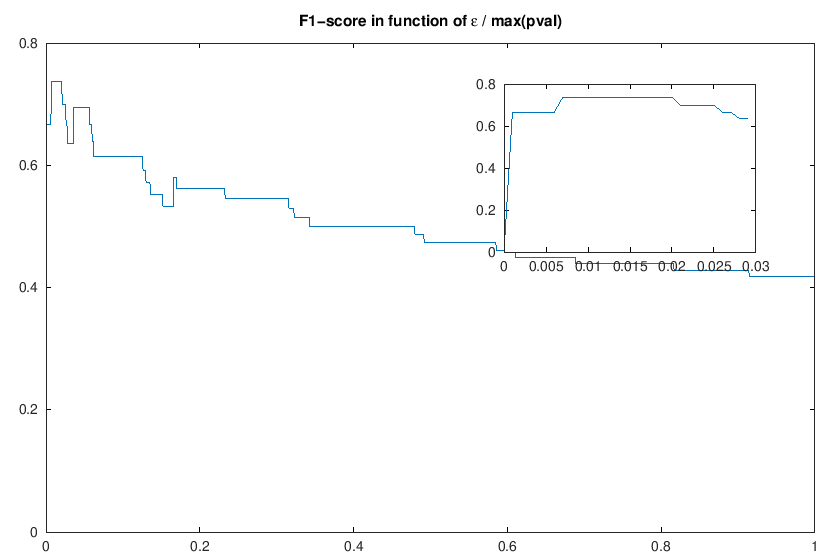

In [15]:
plot(F1Vec(:,1)/max(F1Vec(:,1)), F1Vec(:,2))
% xlim([0, 0.6])
title('F1-score in function of \epsilon / max(pval)', 'fontsize', 16)
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

axes('Position',[.6 .55 .3 .3])
box on
plot(F1Vec(1:30,1)/max(F1Vec(:,1)), F1Vec(1:30,2))
% xlim([min(F1Vec(1:50,1))/max(F1Vec(:,1)) max(F1Vec(1:50,1))])